<a href="https://colab.research.google.com/github/yunuxemre/test/blob/master/TitanikVeriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('TitanicV2.csv')

In [3]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


<ipython-input-5-fa98737cc4ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_c.loc[:, 'survived'] = titanic_c['survived'].map({0:'No', 1:'Yes'})


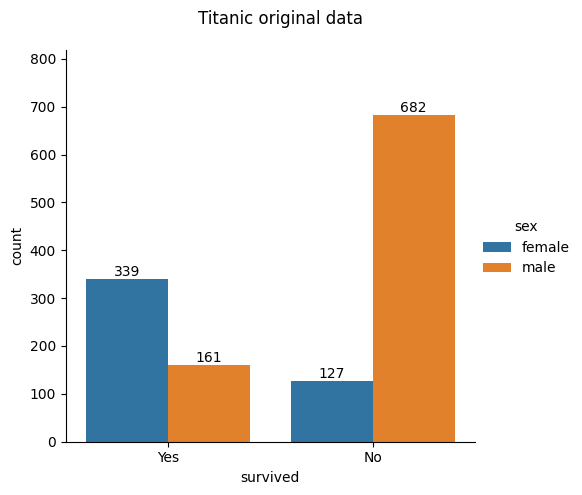

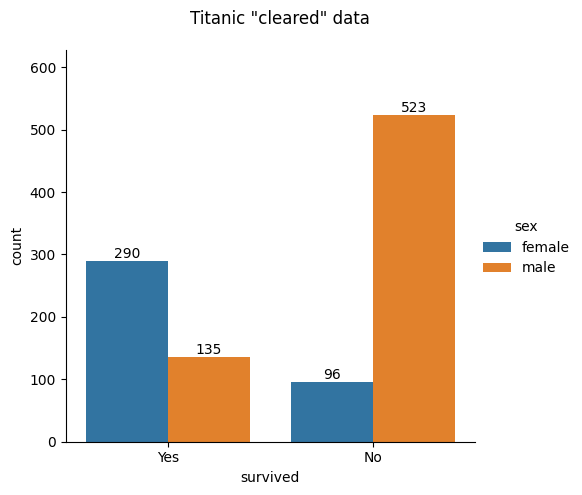

In [5]:
titanic_c = titanic.dropna(subset=['age','embarked'])

titanic.loc[:, 'survived'] = titanic['survived'].map({0:'No', 1:'Yes'})
titanic_c.loc[:, 'survived'] = titanic_c['survived'].map({0:'No', 1:'Yes'})


g1 = sns.catplot(x = 'survived', data = titanic, kind = 'count', hue = 'sex', legend = True)

# iterate through axes (taken from the internet)
for ax in g1.axes.ravel():

    # add annotations (taken from the internet)
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle('Titanic original data')

g2 = sns.catplot(x = 'survived', data = titanic_c, kind = 'count', hue = 'sex')

# iterate through axes (taken from the internet)
for ax in g2.axes.ravel():

    # add annotations (taken from the internet)
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('Titanic "cleared" data')

plt.show()

In [6]:
titanic[['age', 'sex']].groupby('sex').mean()

,age
sex,
female,28.687071
male,30.585233


In [7]:
titanic[['age', 'sex']].groupby('sex').min()

,age
sex,
female,0.1667
male,0.3333


In [8]:
titanic[['age', 'sex']].groupby('sex').max()

,age
sex,
female,76.0
male,80.0


<Axes: xlabel='sex', ylabel='age'>

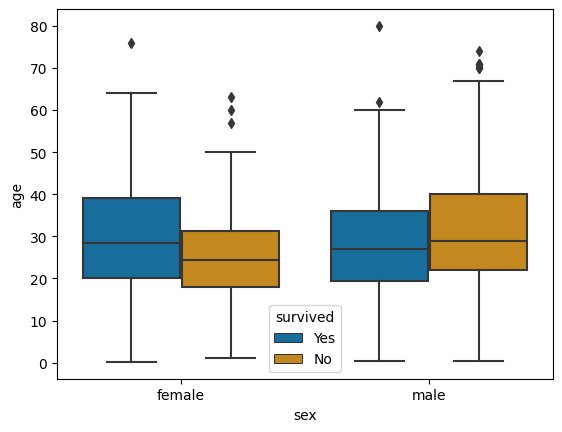

In [9]:
sns.boxplot(data=titanic, x='sex', y='age', hue='survived', palette='colorblind')


<Axes: xlabel='sex', ylabel='age'>

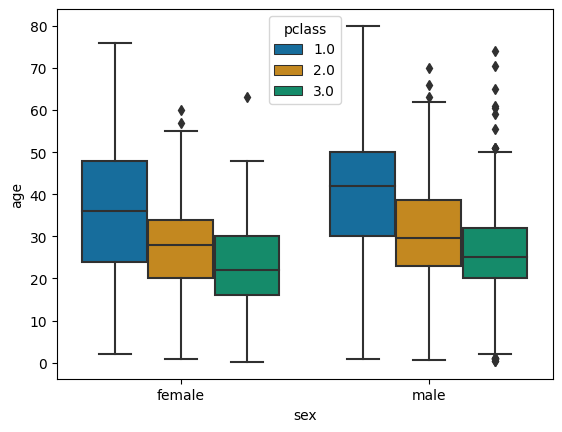

In [10]:
sns.boxplot(titanic, x = 'sex', y = 'age', hue = 'pclass', palette = 'colorblind')

<Axes: xlabel='pclass', ylabel='fare'>

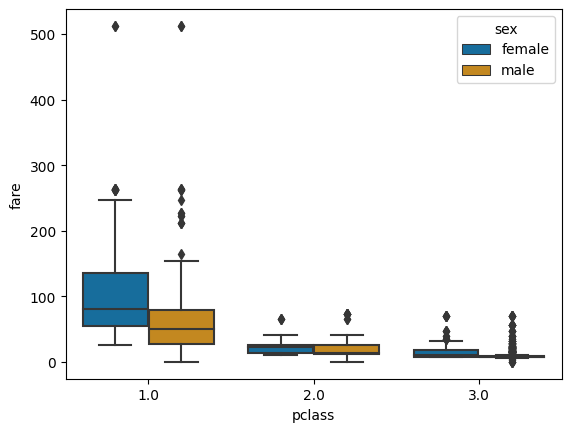

In [11]:
sns.boxplot(titanic, x = 'pclass', y = 'fare', hue = 'sex', palette = 'colorblind')

In [12]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,Yes,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,Yes,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,No,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,Yes,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,No,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [13]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [14]:
def remove_outliers_iqr(data, column_name):
    q1 = titanic['age'].quantile(0.25)
    q3 = titanic['age'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    titanic_age_cleaned = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]
    return titanic_age_cleaned
titanic_age_cleaned = remove_outliers_iqr(titanic, 'age')

print("Before removing outliers:")
print(titanic['age'].describe())

print("\nAfter removing outliers:")
print(titanic_age_cleaned['age'].describe())

Before removing outliers:
count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

After removing outliers:
count    1037.000000
mean       29.514143
std        13.920084
min         0.166700
25%        21.000000
50%        28.000000
75%        38.000000
max        66.000000
Name: age, dtype: float64


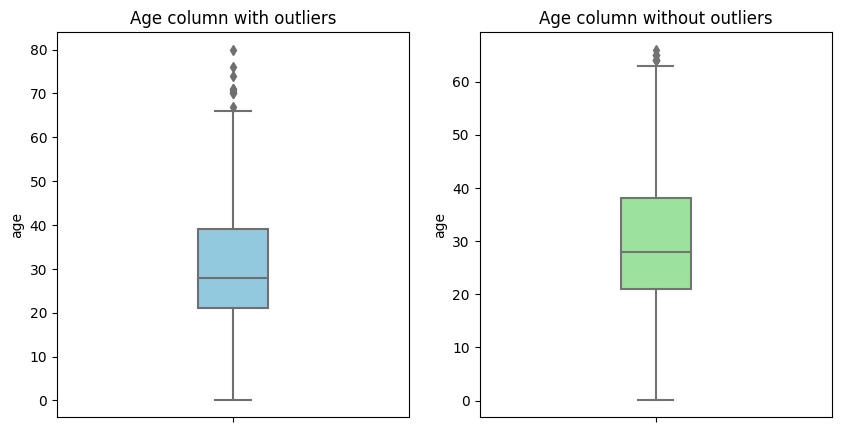

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'age', width = .2, color = 'skyblue')
axes[0].set_title('Age column with outliers')

sns.boxplot(ax = axes[1], data = titanic_age_cleaned, y = 'age', width = .2, color = 'lightgreen')
axes[1].set_title('Age column without outliers')

plt.show()

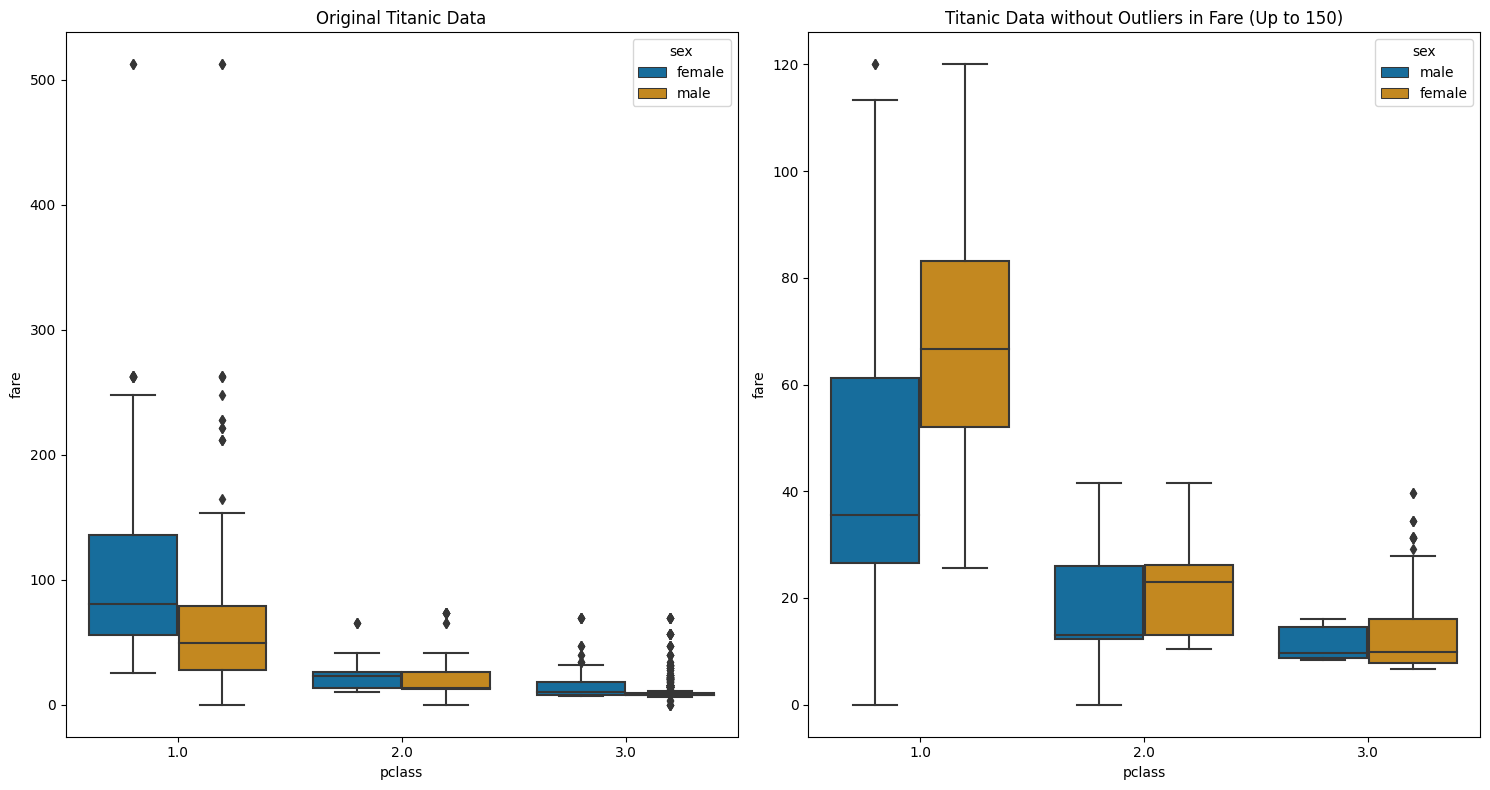

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aykırı değerleri temizleyen fonksiyon
def remove_outliers_iqr(titanic, column_name, class_value, sex_value, multiplier, max_fare):
    # 'Pclass' sütunu belirli bir değere ve 'Sex' sütunu belirli bir değere sahip satırları seçin
    data_class = titanic[(titanic['pclass'] == class_value) & (titanic['sex'] == sex_value)]

    # Belirli bir sütunun çeyrekliklerini hesaplayın
    Q1 = data_class[column_name].quantile(0.25)
    Q3 = data_class[column_name].quantile(0.75)

    # IQR'yi hesaplayın
    IQR = Q3 - Q1

    # Aykırı değerlerin sınırlarını belirleyin
    lower_bound = Q1 - multiplier * IQR + 5
    upper_bound = Q3 + multiplier * IQR + 2

    # Aykırı değerleri ve belirtilen max_fare değerinden büyük olanları temizleyin
    data_cleaned = data_class[
        (data_class[column_name] >= lower_bound) &
        (data_class[column_name] <= upper_bound) &
        (data_class[column_name] <= max_fare)
    ]

    return data_cleaned

# Her bir 'pclass' ve 'sex' kombinasyonu için aykırı değerleri temizleyin
titanic_fare_cleaned = pd.concat([
    remove_outliers_iqr(titanic, 'fare', pclass, sex, multiplier=2.5, max_fare=120)
    for pclass in [1, 2, 3]
    for sex in ['male', 'female']
])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting the original Titanic data
sns.boxplot(ax=axes[0], data=titanic, x='pclass', y='fare', hue='sex', palette='colorblind', dodge=True)
axes[0].set_title('Original Titanic Data')

# Plotting Titanic data without outliers in Fare
sns.boxplot(ax=axes[1], data=titanic_fare_cleaned, x='pclass', y='fare', hue='sex', palette='colorblind', dodge=True)
axes[1].set_title('Titanic Data without Outliers in Fare (Up to 150)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
